In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_files

In [4]:
config = get_config.read_yaml()
tickers = config['data'][config['data']['selected_tickers']]
ticker = tickers[0]
ticker

'ADANIENT.NS'

In [5]:
data = read_files.read_raw_training_data(ticker)
data

Reading Raw Training data: ADANIENT !
Successfully read: ADANIENT !


,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2014-12-16,63.500015,64.271148,62.700048,63.435150,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094


In [6]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

In [7]:
data['rsi'] = ta.RSI(data['Close'], timeperiod=14)
data.head(5)

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,rsi
Date,,,,,,,,,,,
2014-12-16,63.500015,64.271148,62.700048,63.435150,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000,NaN
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,NaN
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,NaN
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,NaN
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,NaN


In [8]:
data['sma-50'] = ta.SMA(data['Close'], timeperiod=50)
data['sma-100'] = ta.SMA(data['Close'], timeperiod=100)
data['sma-200'] = ta.SMA(data['Close'], timeperiod=200)
data['ema-50'] = ta.EMA(data['Close'], timeperiod=50)
data['ema-100'] = ta.EMA(data['Close'], timeperiod=100)
data['ema-200'] = ta.EMA(data['Close'], timeperiod=200)
data.head(5)

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200
Date,,,,,,,,,,,,,,,,,
2014-12-16,63.500015,64.271148,62.700048,63.435150,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


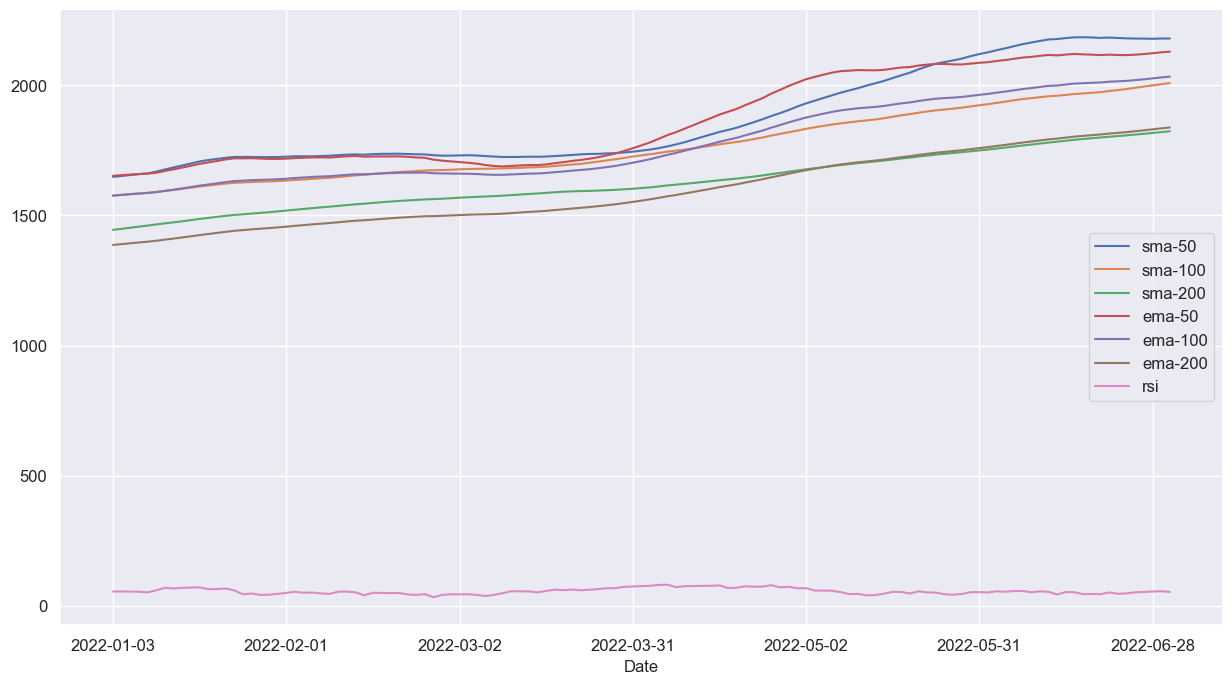

In [9]:
plot_df(data.loc['2022-01-01':'2022-06-30', ['sma-50', 'sma-100', 'sma-200', 'ema-50', 'ema-100', 'ema-200', 'rsi']])

In [10]:
data['atr'] = ta.ATR(data['High'], data['Low'], data['Close'], timeperiod=14)
data['adx'] = ta.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
Date,,,,,,,,,,,,,,,,,,,
2014-12-16,63.500015,64.271148,62.700048,63.435150,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,59.467519,2460.594087,2479.331438,2299.340632,2565.098696,2488.392495,2471.017425,109.831736,40.962667
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,62.494903,2468.124194,2483.350261,2305.844337,2576.774475,2495.807120,2474.916068,108.669777,39.862830
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,60.608080,2474.858032,2486.858555,2312.023199,2587.126514,2502.637702,2478.556222,105.275080,38.848863


In [11]:
data.describe()

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
count,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2218.000000,2183.000000,2133.000000,2033.000000,2183.000000,2133.000000,2033.000000,2218.000000,2205.000000
mean,772.990526,788.564512,757.725029,774.012340,7.758372e+06,0.001700,12.064902,16.055264,3.990362,28.105282,54.869299,760.040114,748.432834,724.743503,760.197092,748.465322,723.569316,31.387151,28.685613
std,1055.773255,1074.848942,1037.705771,1058.075061,1.022366e+07,0.035234,16.478599,22.363682,8.937580,23.672167,14.683926,1034.442334,1014.291761,976.802864,1028.401325,1004.621241,956.436109,45.390111,12.305479
min,31.003136,32.348805,30.712893,31.135067,2.482490e+05,-0.490194,0.483900,0.991114,0.000000,0.000000,12.388907,35.516235,37.241585,38.694968,35.673989,37.225286,39.918333,1.056170,7.628117
25%,70.086317,71.305996,68.851315,70.243239,2.882668e+06,-0.012057,1.093913,1.787964,0.297181,5.941418,45.045076,69.781072,68.538984,67.085890,68.470988,66.116190,65.704993,3.254714,19.353978
50%,145.471664,148.555180,140.888079,145.126113,4.982049e+06,0.001777,2.270534,2.705842,0.848839,23.008794,54.553452,144.230676,148.147108,144.945382,148.882280,143.583123,150.786462,7.076600,25.974796
75%,1534.121155,1561.347611,1493.016125,1530.097004,8.644575e+06,0.016199,23.944693,26.482218,1.547650,47.125284,65.394413,1496.686747,1486.142512,1378.265509,1495.087103,1435.775234,1334.307391,58.134207,35.498797
max,4159.414551,4184.080084,4060.654387,4169.101277,1.701502e+08,0.241910,64.920496,64.920496,46.318566,72.935723,92.280467,3905.573154,3674.955449,3048.497171,3799.718079,3562.145546,3132.343462,318.563424,66.269489


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 2014-12-16 to 2023-12-29
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2232 non-null   float64
 1   High            2232 non-null   float64
 2   Low             2232 non-null   float64
 3   Open            2232 non-null   float64
 4   Volume          2232 non-null   int64  
 5   Returns         2232 non-null   float64
 6   B&H Returns     2232 non-null   float64
 7   B&H Max         2232 non-null   float64
 8   B&H Drawdown    2232 non-null   float64
 9   B&H Drawdown %  2232 non-null   float64
 10  rsi             2218 non-null   float64
 11  sma-50          2183 non-null   float64
 12  sma-100         2133 non-null   float64
 13  sma-200         2033 non-null   float64
 14  ema-50          2183 non-null   float64
 15  ema-100         2133 non-null   float64
 16  ema-200         2033 non-null   float64
 17  atr             2218 no